# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
- Understand and assess precision, recall, and accuracy of classifiers
- Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Your code here
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df.target

X = X.fillna(value=0)

In [4]:
#Normalize the data first
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 2. Create a standard logistic regression model

In [7]:
#Your code here
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear')

model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. Write a function to calculate the precision

In [10]:
list(zip(y, X))

[(1, 'age'),
 (1, 'sex'),
 (1, 'cp'),
 (1, 'trestbps'),
 (1, 'chol'),
 (1, 'fbs'),
 (1, 'restecg'),
 (1, 'thalach'),
 (1, 'exang'),
 (1, 'oldpeak'),
 (1, 'slope'),
 (1, 'ca'),
 (1, 'thal')]

In [8]:
def precision(y_hat, y):
    # precision = number of true positives / number predicted positives
    y_y_hat = list(zip(y, y_hat))
    true_pos = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    false_pos = sum([1 for i in y_y_hat if i[0]==0 and i[1]==1])
    return true_pos/float(true_pos + false_pos)

## 4. Write a function to calculate the recall

In [11]:
def recall(y_hat, y):
    # recall = num of true positives / number of actual total positives
    y_y_hat = list(zip(y, y_hat))
    true_pos = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    false_neg = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return true_pos/float(true_pos+false_neg)

## 5. Write a function to calculate the accuracy

In [12]:
def accuracy(y_hat, y):
    #accuracy = (num of true pos + num of tru neg) / total obs
    y_y_hat = list(zip(y, y_hat))
    true_pos = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    true_neg = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (true_pos + true_neg) / float(len(y_hat))

## 6. Write a function to calculate the F1-score

In [33]:
def f1(y_hat,y):
    #F1-score = 2* (precision * recall)/(precision + recall)
    num = precision(y_hat, y) * recall(y_hat, y)
    denom = precision(y_hat, y) + (recall(y_hat, y))
    return 2 * float(num/denom)

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the train and the test set

In [34]:
#Your code here
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print("Training Precision Score:", precision(y_hat_train, y_train))
print("Testing Precision Score:", precision(y_hat_test, y_test))
print("\n")

print("Training Recall Score:", recall(y_hat_train, y_train))
print("Testing Recall Score:", recall(y_hat_test, y_test))
print("\n")

print("Training Accuracy:", accuracy(y_hat_train, y_train))
print("Testing Accuracy:", accuracy(y_hat_test, y_test))
print("\n")

print("Training F1-Score:", f1(y_hat_train, y_train))
print("Testing F1-Score:", f1(y_hat_test, y_test))

Training Precision Score: 0.8481012658227848
Testing Precision Score: 0.75


Training Recall Score: 0.9115646258503401
Testing Recall Score: 0.8333333333333334


Training Accuracy: 0.8639705882352942
Testing Accuracy: 0.7419354838709677


Training F1-Score: 0.8786885245901639
Testing F1-Score: 0.7894736842105262


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [35]:
#Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Training Precision Score:", precision_score(y_hat_train, y_train))
print("Testing Precision Score:", precision_score(y_hat_test, y_test))
print("\n")

print("Training Recall Score:", recall_score(y_hat_train, y_train))
print("Testing Recall Score:", recall_score(y_hat_test, y_test))
print("\n")

print("Training Accuracy:", accuracy_score(y_hat_train, y_train))
print("Testing Accuracy:", accuracy_score(y_hat_test, y_test))
print("\n")

print("Training F1-Score:", f1_score(y_hat_train, y_train))
print("Testing F1-Score:", f1_score(y_hat_test, y_test))

Training Precision Score: 0.9115646258503401
Testing Precision Score: 0.8333333333333334


Training Recall Score: 0.8481012658227848
Testing Recall Score: 0.75


Training Accuracy: 0.8639705882352942
Testing Accuracy: 0.7419354838709677


Training F1-Score: 0.8786885245901639
Testing F1-Score: 0.7894736842105262


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different training set sizes. What do you notice?

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
    training_F1.append(f1(y_hat_train,y_train))
    testing_F1.append(f1(y_hat_test,y_test))
    

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, test and train accuracy in the third one, and test and train f1-score in the fourth one.

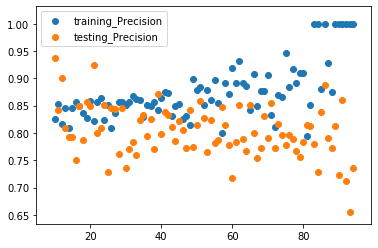

In [37]:
# code for test and train precision
plt.scatter(list(range(10,95)), training_Precision, label="training_Precision")
plt.scatter(list(range(10,95)), testing_Precision, label="testing_Precision")
plt.legend()

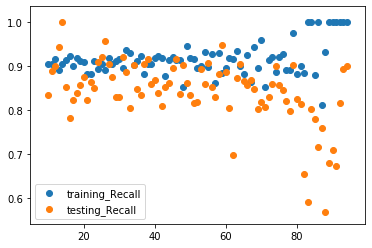

In [38]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label="training_Recall")
plt.scatter(list(range(10,95)), testing_Recall, label="testing_Recall")
plt.legend()

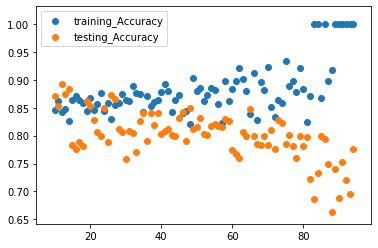

In [39]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label="training_Accuracy")
plt.scatter(list(range(10, 95)), testing_Accuracy, label="testing_Accuracy")
plt.legend()

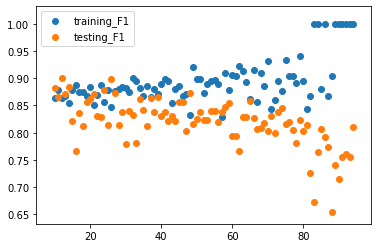

In [40]:
# code for test and train F1-score
plt.scatter(list(range(10,95)), training_F1, label="training_F1")
plt.scatter(list(range(10,95)), testing_F1, label="testing_F1")
plt.legend()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.